In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/dacon/2023.06.06/open.zip' -d '/content/drive/MyDrive/dacon/2023.06.06'

Archive:  /content/drive/MyDrive/dacon/2023.06.06/open.zip
replace /content/drive/MyDrive/dacon/2023.06.06/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Dacon Competition

- 1. 데이터 파악 , 통계적 측정

- 2. EDA + 시각화

- 3. 베이스라인 모델 설계 

- 4. Feature Engineering

- 5. 모델 설계

- 6. 튜닝 작업

## 1. 데이터 파악 , 통계적 측정

In [ ]:
# improt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression # 베이스라인 모델
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [61]:
def vectorization(model , data , condition):
    
    if condition:
        
        facts_vec = model.fit_transform(data['facts'])
    
    else:

        facts_vec = model.transform(data['facts'])
    
    first_vec = model.transform(data['first_party'])
    second_vec = model.transform(data['second_party'])

    result = np.concatenate([first_vec.toarray() , second_vec.toarray() , facts_vec.toarray()] , axis = 1)
    return result

In [ ]:
# 데이터 불러오기

train_df = pd.read_csv("/content/drive/MyDrive/dacon/2023.06.06/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/dacon/2023.06.06/test.csv")

- ID : 사건 샘플 ID
- first_party : 사건의 첫 번째 당사자
- second_party : 사건의 두 번째 당사자
- facts : 사건 내용
- first_party_winner : 첫 번째 당사자의 승소 여부 (0 : 패배, 1 : 승리)

In [ ]:
train_df.head(10)

,ID,first_party,second_party,facts,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1
5,TRAIN_0005,"C & A Carbone, Inc., et al.",Town of Clarkstown,"A New York town, Clarkstown, allowed a contrac...",1
6,TRAIN_0006,"David Jennings, et al.","Alejandro Rodriguez, et al.",Sections of the Immigration and Nationality Ac...,1
7,TRAIN_0007,"US Airways, Inc.",Barnett,"In 1990, Robert Barnett injured his back while...",1
8,TRAIN_0008,"Ron Davis, Acting Warden",Hector Ayala,"Hector Ayala, a Hispanic man, was charged with...",1
9,TRAIN_0009,Paul A. McDaniel,"Selma Cash Paty, et al.","Since its first state Constitution in 1796, Te...",1


In [ ]:
print(train_df.info() , "\n")
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  2478 non-null   object
 1   first_party         2478 non-null   object
 2   second_party        2478 non-null   object
 3   facts               2478 non-null   object
 4   first_party_winner  2478 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 96.9+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            1240 non-null   object
 1   first_party   1240 non-null   object
 2   second_party  1240 non-null   object
 3   facts         1240 non-null   object
dtypes: object(4)
memory usage: 38.9+ KB
None


<Axes: >

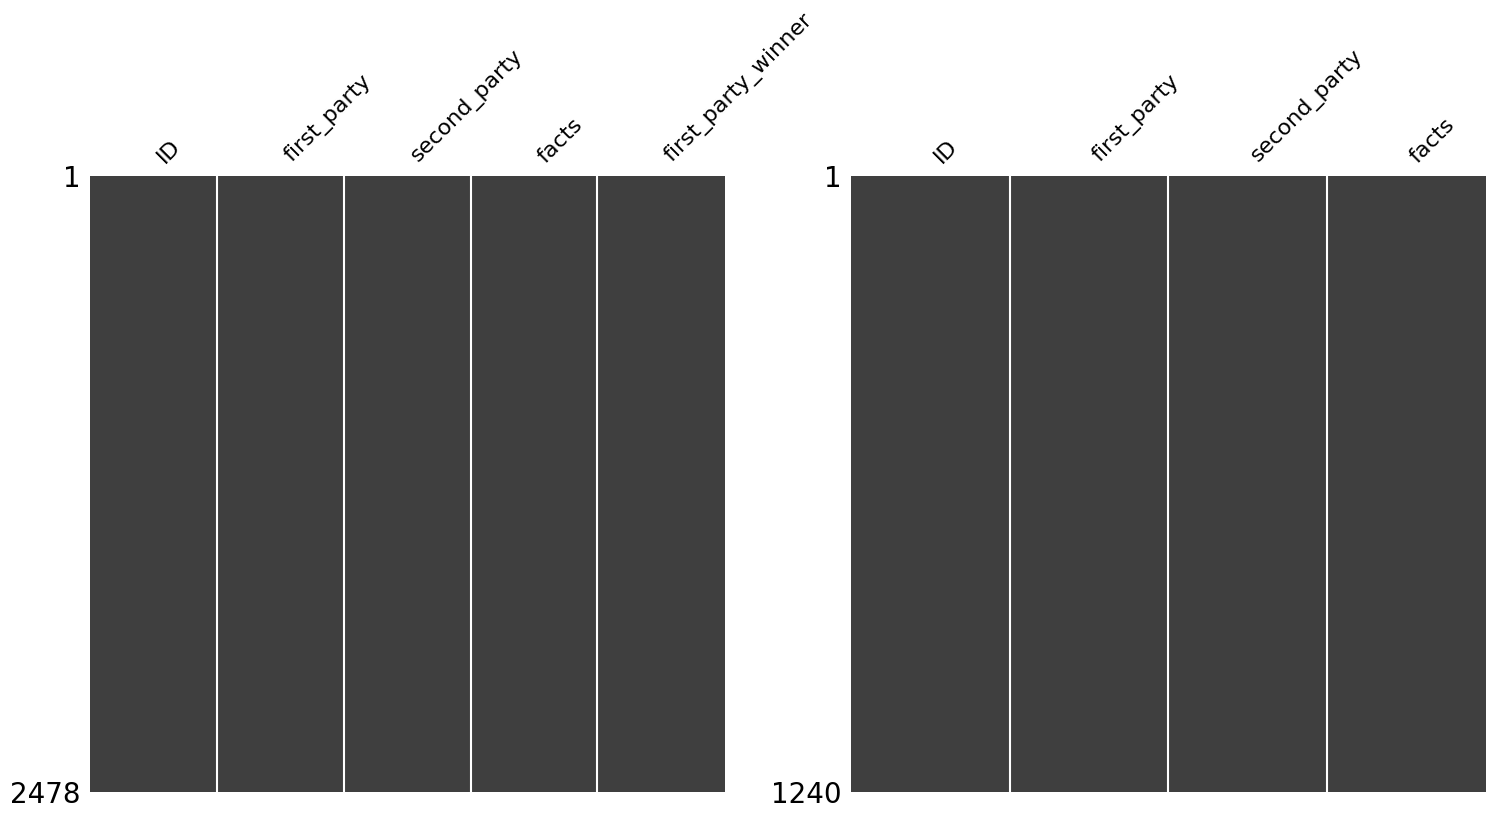

In [ ]:
# 결측값 파악
f , ax = plt.subplots(1 , 2 , figsize = (18 , 8))
msno.matrix(train_df , ax = ax[0])
msno.matrix(test_df , ax = ax[1])

## 2. EDA + 시각화

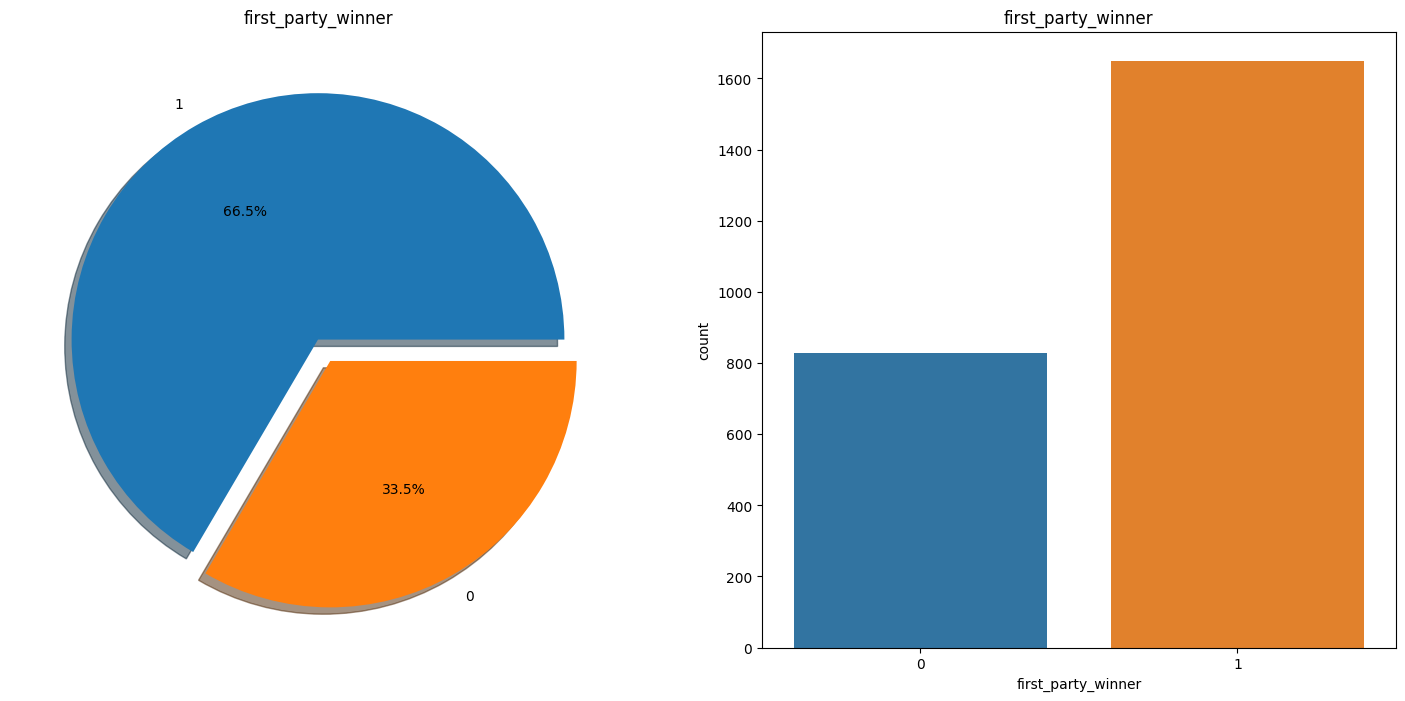

In [ ]:
# 승소 비율
f , ax = plt.subplots(1 , 2 , figsize = (18 , 8))

train_df['first_party_winner'].value_counts().plot.pie(explode = [0 , 0.1] , autopct = '%1.1f%%' ,
                                                       ax = ax[0] , shadow = True)
ax[0].set_title('first_party_winner')
ax[0].set_ylabel('')
sns.countplot(x = 'first_party_winner' , data = train_df , ax = ax[1])
ax[1].set_title('first_party_winner')
plt.show()